In [46]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [47]:
I = np.array([[1, 0], [0, 1]])  # Identity Gate
X = np.array([[0, 1], [1, 0]])  # Pauli-X Gate
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])  # Hadamard Gate

# Two-qubit CNOT gate
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])


In [48]:
def kronecker_product(*matrices):
    result = matrices[0]
    for matrix in matrices[1:]:
        result = np.kron(result, matrix)
    return result


In [49]:
def apply_gate(state, gate, target, num_qubits):
    full_gate = [I] * num_qubits
    full_gate[target] = gate
    gate_matrix = kronecker_product(*full_gate)
    return gate_matrix @ state


In [50]:
def simulate_circuit_naive(num_qubits, gates):
    state = np.zeros(2**num_qubits)
    state[0] = 1

    for gate, target in gates:
        state = apply_gate(state, gate, target, num_qubits)

    return state


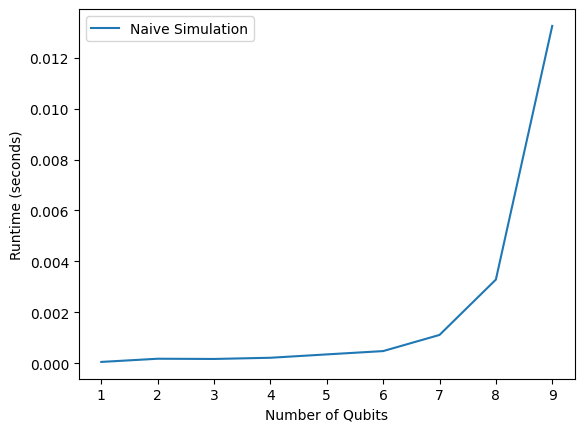

In [51]:
num_qubits_list = list(range(1, 10))
runtimes = []

for num_qubits in num_qubits_list:
    gates = [(H, 0)]
    if num_qubits > 1:
        gates.append((X, 1))

    start_time = time.time()
    simulate_circuit_naive(num_qubits, gates)
    runtimes.append(time.time() - start_time)

plt.plot(num_qubits_list, runtimes, label="Naive Simulation")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.show()


In [52]:
def initialize_tensor_state(num_qubits):
    state = np.zeros([2] * num_qubits)
    state[(0,) * num_qubits] = 1  #
    return state


In [53]:
def apply_gate_tensor(state, gate, target_axis):
    axes = ([1], [target_axis])
    return np.tensordot(gate, state, axes=axes)


In [54]:
def simulate_circuit_tensor(num_qubits, gates):
    state = initialize_tensor_state(num_qubits)
    for gate, target in gates:
        state = apply_gate_tensor(state, gate, target)
    return state


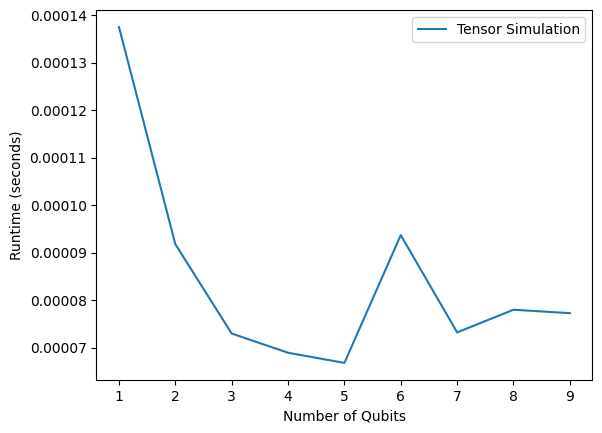

In [55]:
runtimes_tensor = []

for num_qubits in num_qubits_list:
    gates = [(H, 0)]
    if num_qubits > 1:
        gates.append((X, 1))

    start_time = time.time()
    simulate_circuit_tensor(num_qubits, gates)
    runtimes_tensor.append(time.time() - start_time)

plt.plot(num_qubits_list, runtimes_tensor, label="Tensor Simulation")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.show()


In [56]:
def sample_state(state, num_samples=1000):
    probabilities = np.abs(state.flatten()) ** 2
    indices = np.arange(len(state.flatten()))
    samples = np.random.choice(indices, num_samples, p=probabilities)
    return samples


In [57]:
def expectation_value(state, operator):
    return np.real(np.vdot(state, operator @ state))
